# Implicit method

### Heat equation: metal heated in the middle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Steps:
h = 0.001
k = 0.001

# Axes:
x = np.arange(0, 1 + h, h)
t = np.arange(0, 0.1 + k, k)

#print(t)

In [3]:
# initial and boundary conditions

bcs = [0, 0]
ics = np.sin(np.pi*x)

# Matrix

n = len(x)
m = len(t)

# Fill up with zeroes
T = np.zeros((n, m))

#print(T.shape)

# Add the initial conditions
T[:, 0] = ics

# Add the boundary conditions
T[0, :] = bcs[0]
T[-1, :] = bcs[1]

# Fix c^2
c_2 = 1

# Fix r
factor = c_2*k/h**2


#print(factor)

#print(T)

In [4]:
# Fill up the diagonal values of the matrix

D_matrix_0 = np.diag([1 + 2*factor]*(n - 2), 0)

D_matrix_n = np.diag([-factor]*(n - 3), -1)

D_matrix_p = np.diag([-factor]*(n - 3), +1)

D_matrix   = D_matrix_0 + D_matrix_n + D_matrix_p

#print(D_matrix.shape, D_matrix_n.shape, D_matrix_p.shape)
print(D_matrix.shape)

(999, 999)


In [5]:
# Create b vector

for j in range(1, m):
    
    b = T[1:-1, j-1].copy()
    
    b[0]  = b[0]  + factor*T[0,  j]
    
    b[-1] = b[-1] + factor*T[-1, j]
    
    solution = np.linalg.solve(D_matrix, b)
    
    T[1:-1, j] = solution
    
    #print(solution)

#print(b.shape)

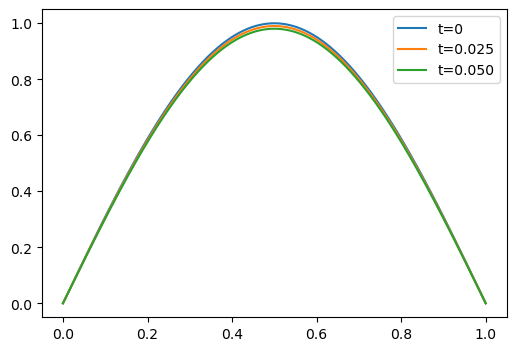

In [6]:
plt.figure(figsize=(6,4))

plt.plot(x, T[:, 0], label = 't=0')

plt.plot(x, T[:, 1], label = 't=0.025')

plt.plot(x, T[:, 2], label = 't=0.050')

plt.legend()
plt.show()

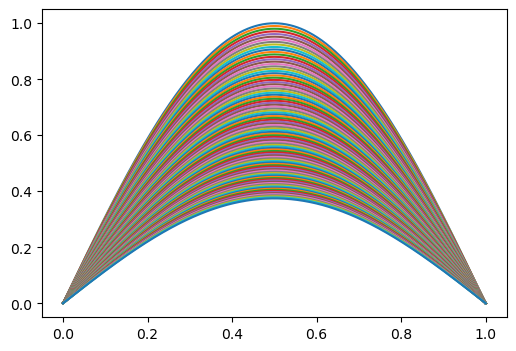

In [7]:
plt.figure(figsize=(6,4))

plt.plot(x, T)

#plt.legend()
plt.show()

In [8]:
# Create 2D grid

x_grid, t_grid = np.meshgrid(x, t)

print(x_grid.shape, t_grid.shape, T.T.shape)

(101, 1001) (101, 1001) (101, 1001)


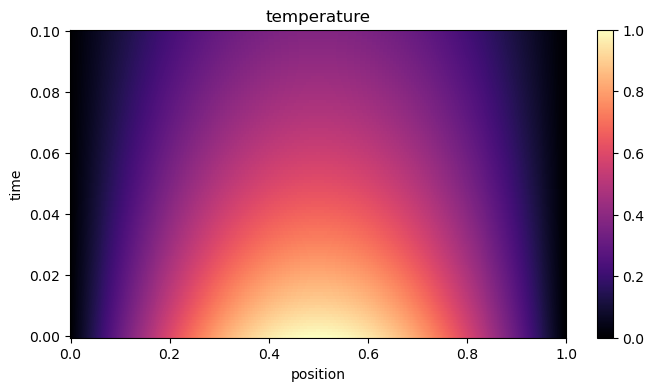

In [9]:
plt.figure(figsize=(8,4))

Z1 = plt.pcolor(x_grid, t_grid, T.T, cmap = 'magma')

plt.xlabel("position")

plt.ylabel("time")

plt.title("temperature")

plt.colorbar(Z1)

plt.show()